## IMPORTS

In [1]:
from PIL import Image, ImageDraw, ImageFont

from matplotlib.pyplot import imshow as plt_imshow
import numpy as np
%matplotlib inline

In [2]:
import random
import spacy
import sys
import requests
import itertools

from flask import Flask
sys.path.append('/Users/liangjh/Workspace/tspire-api/')

from app.images import pixabay, poster
from app.spire import spiremodel

Loading environments: config.default, config.development


## INIT FLASK ENV

In [3]:
app = Flask('test')
app.config.from_object('config.default')
app.config.from_object('config.development') # change to env needed

## GENERATE TSPIRE

In [4]:
text = spiremodel.markov_generate('Trump', params=app.config)
topics = spiremodel.sentence_topic_extract(text, app.config['TOPIC_PARSE_RULES'])

Generating markov text for persona: Trump
checking key: Trump_{'MODEL_DIRECTORY': '/Users/liangjh/Workspace/tspire-api/data/model/', 'MARKOV_MODELS': {'Trump': [{'name': 'model-speech', 'filename': 'trumpspire-model-01.json', 'max_chars': 200}, {'name': 'model-tweet', 'filename': 'trumpspire-model-02.json', 'max_chars': 150}]}, 'PERSONAS': ['Trump']}__
key dne -- reinitializing...
Initializing markov model for persona: Trump
Markov text (Trump): But he ’s a fringe candidate ... when you do a little question and answer .
checking key: en_core_web_sm__
key dne -- reinitializing...


In [11]:
title = topics[0].text if len(topics) > 0 else ''
results = pixabay.search_images(title, app.config['PIXABAY_API_KEY'])
# img = pixabay.download_image(results[random.randint(0,len(results))]) if len(results) > 0 \
#             else pixabay.predl_image_random(app.config['IMAGE_DIRECTORY'])

In [12]:
img = pixabay.predl_image_random(app.config['IMAGE_DIRECTORY'])

In [13]:
poster_img = poster.make_poster(img, app.config['POSTER_PARAMS']['Trump'], app.config['DATA_DIRECTORY'],
                               title=title.upper(), quote=text)

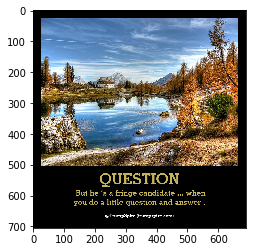

In [14]:
plt_imshow(np.asarray(poster_img))

In [15]:
poster.save_poster(poster_img, '/Users/liangjh/Desktop/')

{'guid': '9982ed8c232f4b669343e84d582e88c1',
 'img_file_lg': '9982ed8c232f4b669343e84d582e88c1-lg.jpg',
 'img_file_sm': '9982ed8c232f4b669343e84d582e88c1-sm.jpg'}

## DEBUG

### DOWNLOAD PRE-DL IMAGES

In [27]:
full_results = []
for i in range(1,4):
    print('requesting page: {}'.format(i))
    response = requests.get(pixabay.PIXABAY_SEARCH_URL, 
                           params={'q': 'skyscraper', 'key': app.config['PIXABAY_API_KEY'], 
                                   'image_type': 'photo', 'per_page': 200, 'page': i})
    results = response.json().get('hits', [])
    full_results.append(results)

requesting page: 1
requesting page: 2
requesting page: 3


In [28]:
full_results = list(itertools.chain(*full_results))

In [29]:
for res in full_results:
    print('downloading / saving image: {}'.format(res['id']))
    try:
        im = pixabay.download_image({'url': res['webformatURL']})
        im.save('/Users/liangjh/Workspace/tspire-api/data/images/raw/{}.jpg'.format(res['id']), optimize=True)
    except:
        pass

downloading / saving image: 3076685
downloading / saving image: 438393
downloading / saving image: 2940655
downloading / saving image: 1990268
downloading / saving image: 690364
downloading / saving image: 2117310
downloading / saving image: 768432
downloading / saving image: 1245953
downloading / saving image: 690868
downloading / saving image: 3121009
downloading / saving image: 1245817
downloading / saving image: 1026246
downloading / saving image: 2014618
downloading / saving image: 321034
downloading / saving image: 381233
downloading / saving image: 89197
downloading / saving image: 255116
downloading / saving image: 843229
downloading / saving image: 1927265
downloading / saving image: 769790
downloading / saving image: 2185510
downloading / saving image: 1767540
downloading / saving image: 2430571
downloading / saving image: 2256489
downloading / saving image: 2517653
downloading / saving image: 336475
downloading / saving image: 349687
downloading / saving image: 1209938
downl

downloading / saving image: 415476
downloading / saving image: 4372296
downloading / saving image: 3021474
downloading / saving image: 828984
downloading / saving image: 802074
downloading / saving image: 3216809
downloading / saving image: 3483539
downloading / saving image: 789626
downloading / saving image: 1210010
downloading / saving image: 690214
downloading / saving image: 768501
downloading / saving image: 1245986
downloading / saving image: 1851115
downloading / saving image: 1868272
downloading / saving image: 2178868
downloading / saving image: 4011989
downloading / saving image: 1842606
downloading / saving image: 3547224
downloading / saving image: 1245984
downloading / saving image: 3588171
downloading / saving image: 3540883
downloading / saving image: 111329
downloading / saving image: 21883
downloading / saving image: 1870010
downloading / saving image: 2653
downloading / saving image: 984195
downloading / saving image: 1209719
downloading / saving image: 1853365
downl

downloading / saving image: 101633
downloading / saving image: 945386
downloading / saving image: 1534128
downloading / saving image: 1228514
downloading / saving image: 3998131
downloading / saving image: 2864735
downloading / saving image: 1209937
downloading / saving image: 768773
downloading / saving image: 2158447
downloading / saving image: 1031149
downloading / saving image: 2562316
downloading / saving image: 737190
downloading / saving image: 1867569
downloading / saving image: 918691
downloading / saving image: 1149462
downloading / saving image: 3274767
downloading / saving image: 1846728
downloading / saving image: 1283634
downloading / saving image: 1149510
downloading / saving image: 3268990
downloading / saving image: 1031343
downloading / saving image: 2595597
downloading / saving image: 768466
downloading / saving image: 3118803
downloading / saving image: 4340541
downloading / saving image: 3488306
downloading / saving image: 1186466
downloading / saving image: 435350

### TOPIC/TEXT NLP

In [7]:
topics, text

([1,000 miles], 'We need 1,000 miles and we have made them that way .')

In [8]:
nlp = spiremodel.get_nlp_model()
doc = nlp(text)

checking key: __
key dne -- reinitializing...


In [10]:
for ent in doc.ents:
    print(ent.text, ent.label_, spacy.explain(ent.label_))

Washington Post ORG Companies, agencies, institutions, etc.
New York Times ORG Companies, agencies, institutions, etc.


In [78]:
for token in doc:
    print(token.text, ' | ', 
          token.pos_, ' : ', spacy.explain(token.pos_), ' | ', 
#          token.tag_, ' : ', spacy.explain(token.tag_), ' | ',
          token.dep_, ' : ', spacy.explain(token.dep_), ' | ',
          token.ent_type_) 

do  |  VERB  :  verb  |  aux  :  auxiliary  |  
n't  |  ADV  :  adverb  |  neg  :  negation modifier  |  
cause  |  VERB  :  verb  |  ROOT  :  None  |  
a  |  DET  :  determiner  |  det  :  determiner  |  
Humanitarian  |  PROPN  :  proper noun  |  compound  :  None  |  
Crisis  |  PROPN  :  proper noun  |  dobj  :  direct object  |  
at  |  ADP  :  adposition  |  prep  :  prepositional modifier  |  
the  |  DET  :  determiner  |  det  :  determiner  |  
border  |  NOUN  :  noun  |  pobj  :  object of preposition  |  


### DATABASE TEST

In [18]:
from app.db import dbrelational
from app.db import tspire as db_tspire

In [28]:
import importlib
importlib.reload(dbrelational)
importlib.reload(db_tspire)

<module 'app.db.tspire' from '/Users/liangjh/Workspace/tspire-api/app/db/tspire.py'>

In [29]:
db_tspire.tspire_save('xyz1234', 'Trump', 'xyz1234-lg.jpg', 'xyz1324-sm.jpg', 
                      'This is Test', 'This is a test, one two three.. go!')

In [30]:
db_tspire.tspire_latest()

,guid,persona,img_file_lg,img_file_sm,title,text,created_at
0,xyz1234,Trump,xyz1234-lg.jpg,xyz1324-sm.jpg,This is Test,"This is a test, one two three.. go!",2019-08-26 10:57:00.657674
1,asdfasdf,Trump,asdfasdf-lg.jpg,asdfasdf-sm.jpg,Hello World,"Hello, world, this is a autogen tweet",2019-08-26 08:26:40.780618
